# Measurements

There are two things that we should have realised based on our first experiments with unsupervised training:

a) It is not trivial to train and optimise machine learning models 
   - There are a lots of knobs and buttons to press and turn
   - The choice of training material has a major impact but is very hard to control
   
b) It can be very time-intensive to evaluate a model.
   - There might also be room for subjective bias if we evaluate 
   - If we train multiple times we would like to be able to conserve our evaluation efforts.
   

This notebook takes a look at two ways for evaluating machine learning models:

* Quantitative Evaluation
* Qualitative Evaluation

It is important to note that the basis for all evaluation of machine learning models is always human judgement. 
In the end, right or wrong has to be based on some form of judgement from humans. 
This holds true for the quantitative as well as the qualitative evaluation.


## Quantitative Evaluation

`Quantitative Evaluation` is based on definining a metric and taking measurements relating to the models we train. This is in many cases referred to as the `accuracy` or `performance` of a trained model. 
Different metrics have different units and ranges (e.g. 0-1, 0-100%). 

### Baseline

Different trained models are compared based on these measurements. 
It is usually custom to train a first model, evaluate it, and use those first measurements as a `baseline`.
`Baseline` in this case just means that we create a solid first measurement which will serve as a comparison point for future model training.

Quite often we also make use of `baselines` established by other people. E.g. baselines published in scientific papers. 
Those baselines are often used in order to make sure that our `set up` is correct. I.e. that our machine learning stack and the results that we achieve are in line with the `state of the art` (as good as we should expect them to be).

### Validity

Validity refers to the certainty that we measure what we want to measure.
This may sound a bit strange at first "measure what we want to measure".

Consider the following scenario.
* You are tasked with creating an e-mail sorting system based on machine learning
* The system is supposed to be used in production for all emails at a large multi-national company
* In order to test the accuracy of your system you take 20 sample e-mails, have them sorted, and then count how many are correctly sorted.

What are your thoughts towards these measurements?

* Are we measuring the performance of our system?
* How did we choose these 20 e-mails?
* Does the method of choice influence what we measure? 

Once one starts to consider these aspects the question of validity quickly gains in complexity.
Often people will then attempt to measure higher level concepts such as `user satisfaction`. 
However it turns out, that one cannot escape the question of validity by taking that route.
On the contrary, the higher the abstraction level, the more complex the question of validity becomes.

Thinking about validity is an extremely valuable asset in many engineering and business related aspects as measurements are the basis for all optimisations.


## Qualitative Evaluation

Qualitative evaluation is often somewhat neglected or not taken serious enough in professional set ups.
Qualitative evaluation refers to all evaluation efforts that are not specifically based on measurement of 'hard' numbers (probably the reason why it is often not taken serious).

Qualitivate evaluation can be useful for identifying a range of:

* potential problems in the machine learning set up (noise in the data, bias in the training data, quality problems in the training data)
* potential for optimisiations (e.g. additional pre-processing that might be beneficial, direct hyperparameters, introduction of new hyperparameters)

Structured approaches to qualitative evaluation benefits from efficient ways to slice through the data represented by the model. This can consist of using visualisations, descriptive statistics, or smart sampling (choosing sub-sets) on basis of the trained models.








In [1]:
# imports needed and set up logging
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


# Introducing a Metric for Word2Vec


Based on the last exercise we will try to implement a metric that helps us to measure how good a semantic space is. 

The metric is based on a word analogy task described in the following paper: https://arxiv.org/pdf/1607.04606v1.pdf.

The semantic space we have trained is used to do predictions of the following form:

    Example analogy: amazing amazingly calm calmly

    This analogy is marked correct if:

    embedding(amazing) – embedding(amazingly)

    = embedding(calm) – embedding(calmly)
    
The model scores a point if it correctly predicts calmly given the first three elements. 

You can see the analogy pairs of the test set based on the following link:

https://raw.githubusercontent.com/RaRe-Technologies/gensim/develop/gensim/test/test_data/questions-words.txt

In order to use them for evaluation you will have to download the above file locally or to a remote notebook (depending on your setup).



In [8]:
# as a first step use the "gensim.models.KeyedVectors.load_word2vec_format()" method to load a model we have trained before. 

model = gensim.models.KeyedVectors.load_word2vec_format("./data/reviews_150_10_min_15.model")

from gensim.test.utils import datapath
wv_from_text = gensim.models.KeyedVectors.load_word2vec_format('./data/reviews_150_10_min_15.model')
# wv_from_text.evaluate_word_analogies(datapath('custom-words.txt'))
wv_from_text.evaluate_word_analogies('./data/custom-evaluation.txt')


2023-10-24 19:45:59,147 : INFO : loading projection weights from ./data/reviews_150_10_min_15.model
2023-10-24 19:46:00,006 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (22109, 150) matrix of type float32 from ./data/reviews_150_10_min_15.model', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-10-24T19:46:00.006812', 'gensim': '4.3.2', 'python': '3.11.4 (main, Jul 25 2023, 17:36:13) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.6-arm64-arm-64bit', 'event': 'load_word2vec_format'}
2023-10-24 19:46:00,007 : INFO : loading projection weights from ./data/reviews_150_10_min_15.model
2023-10-24 19:46:00,840 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (22109, 150) matrix of type float32 from ./data/reviews_150_10_min_15.model', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-10-24T19:46:00.840332', 'gensim': '4.3.2', 'python': '3.11.4 (main, Jul 25 2023, 17:36:13) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.6-arm64-arm-64bit',

(0.0300820419325433,
 [{'section': 'capital-common-countries',
   'correct': [('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
    ('BANGKOK', 'THAILAND', 'PARIS', 'FRANCE'),
    ('LONDON', 'ENGLAND', 'ATHENS', 'GREECE'),
    ('LONDON', 'ENGLAND', 'BERLIN', 'GERMANY'),
    ('MADRID', 'SPAIN', 'BERLIN', 'GERMANY'),
    ('MOSCOW', 'RUSSIA', 'BERLIN', 'GERMANY'),
    ('PARIS', 'FRANCE', 'BERLIN', 'GERMANY'),
    ('PARIS', 'FRANCE', 'OTTAWA', 'CANADA'),
    ('STOCKHOLM', 'SWEDEN', 'MADRID', 'SPAIN')],
   'incorrect': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
    ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
    ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
    ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
    ('ATHENS', 'GREECE', 'LONDON', 'ENGLAND'),
    ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
    ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
    ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
    ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
    ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
    ('ATHENS', 'GREECE', 'STOCKHOLM

## Evaluating Results

The results we will see will depend heavily on the dataset we use. 

This is a good example of domain specificity. The result of the training but also of the evaluation will depend heavily on the context from which the training material is taken. 

In general if we want to apply machine learning to very specified domains or business use cases we often have to create our own evaluation sets in order to make sure that our measurements are representative.

If we use the pre-defined data set it is likely that we will see a lot of Out-Of-Vocabulary (OOV) events. I.e. the test set contains a lot of concepts that are not contained in our semantic space (because they were completely missing or did not appear often enough in our training data set for the machine to learn it).

It should become clear how such quantitative evaluation can be useful for comparing models. 
However, it is important to always remember the question of validity and to consider effects such as OOV.

## Exercise: Test Set Creation


Based on the format and definition of the word analogy task create a small (up to 50 entries max) test set for the swiss text or review dataset that is more appropriate.

For some background on the analogy task you can read up in the original publication under the "Word Analogy Tasks" section. 

Repeat the measurement with the custom test set you have created. 

## Qualitative Evaluation Based On T-SNE

We will also take a look at qualitative evaluation based on another unsupervised learning technique called T-SNE.

T-SNE takes as input elements that can be compared to each other and learns a representation that tries to optimise placing related items closer to each other (it is easy to imagine how this is a non-trivial task if we are dealing with a large number of items).

We introduce this method as a prototypical way to qualitatively evaluate the models we trained.



2023-10-24 19:29:59,058 : INFO : loading projection weights from ./data/reviews_150_10_min_15.model
2023-10-24 19:29:59,896 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (22109, 150) matrix of type float32 from ./data/reviews_150_10_min_15.model', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-10-24T19:29:59.896368', 'gensim': '4.3.2', 'python': '3.11.4 (main, Jul 25 2023, 17:36:13) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.6-arm64-arm-64bit', 'event': 'load_word2vec_format'}


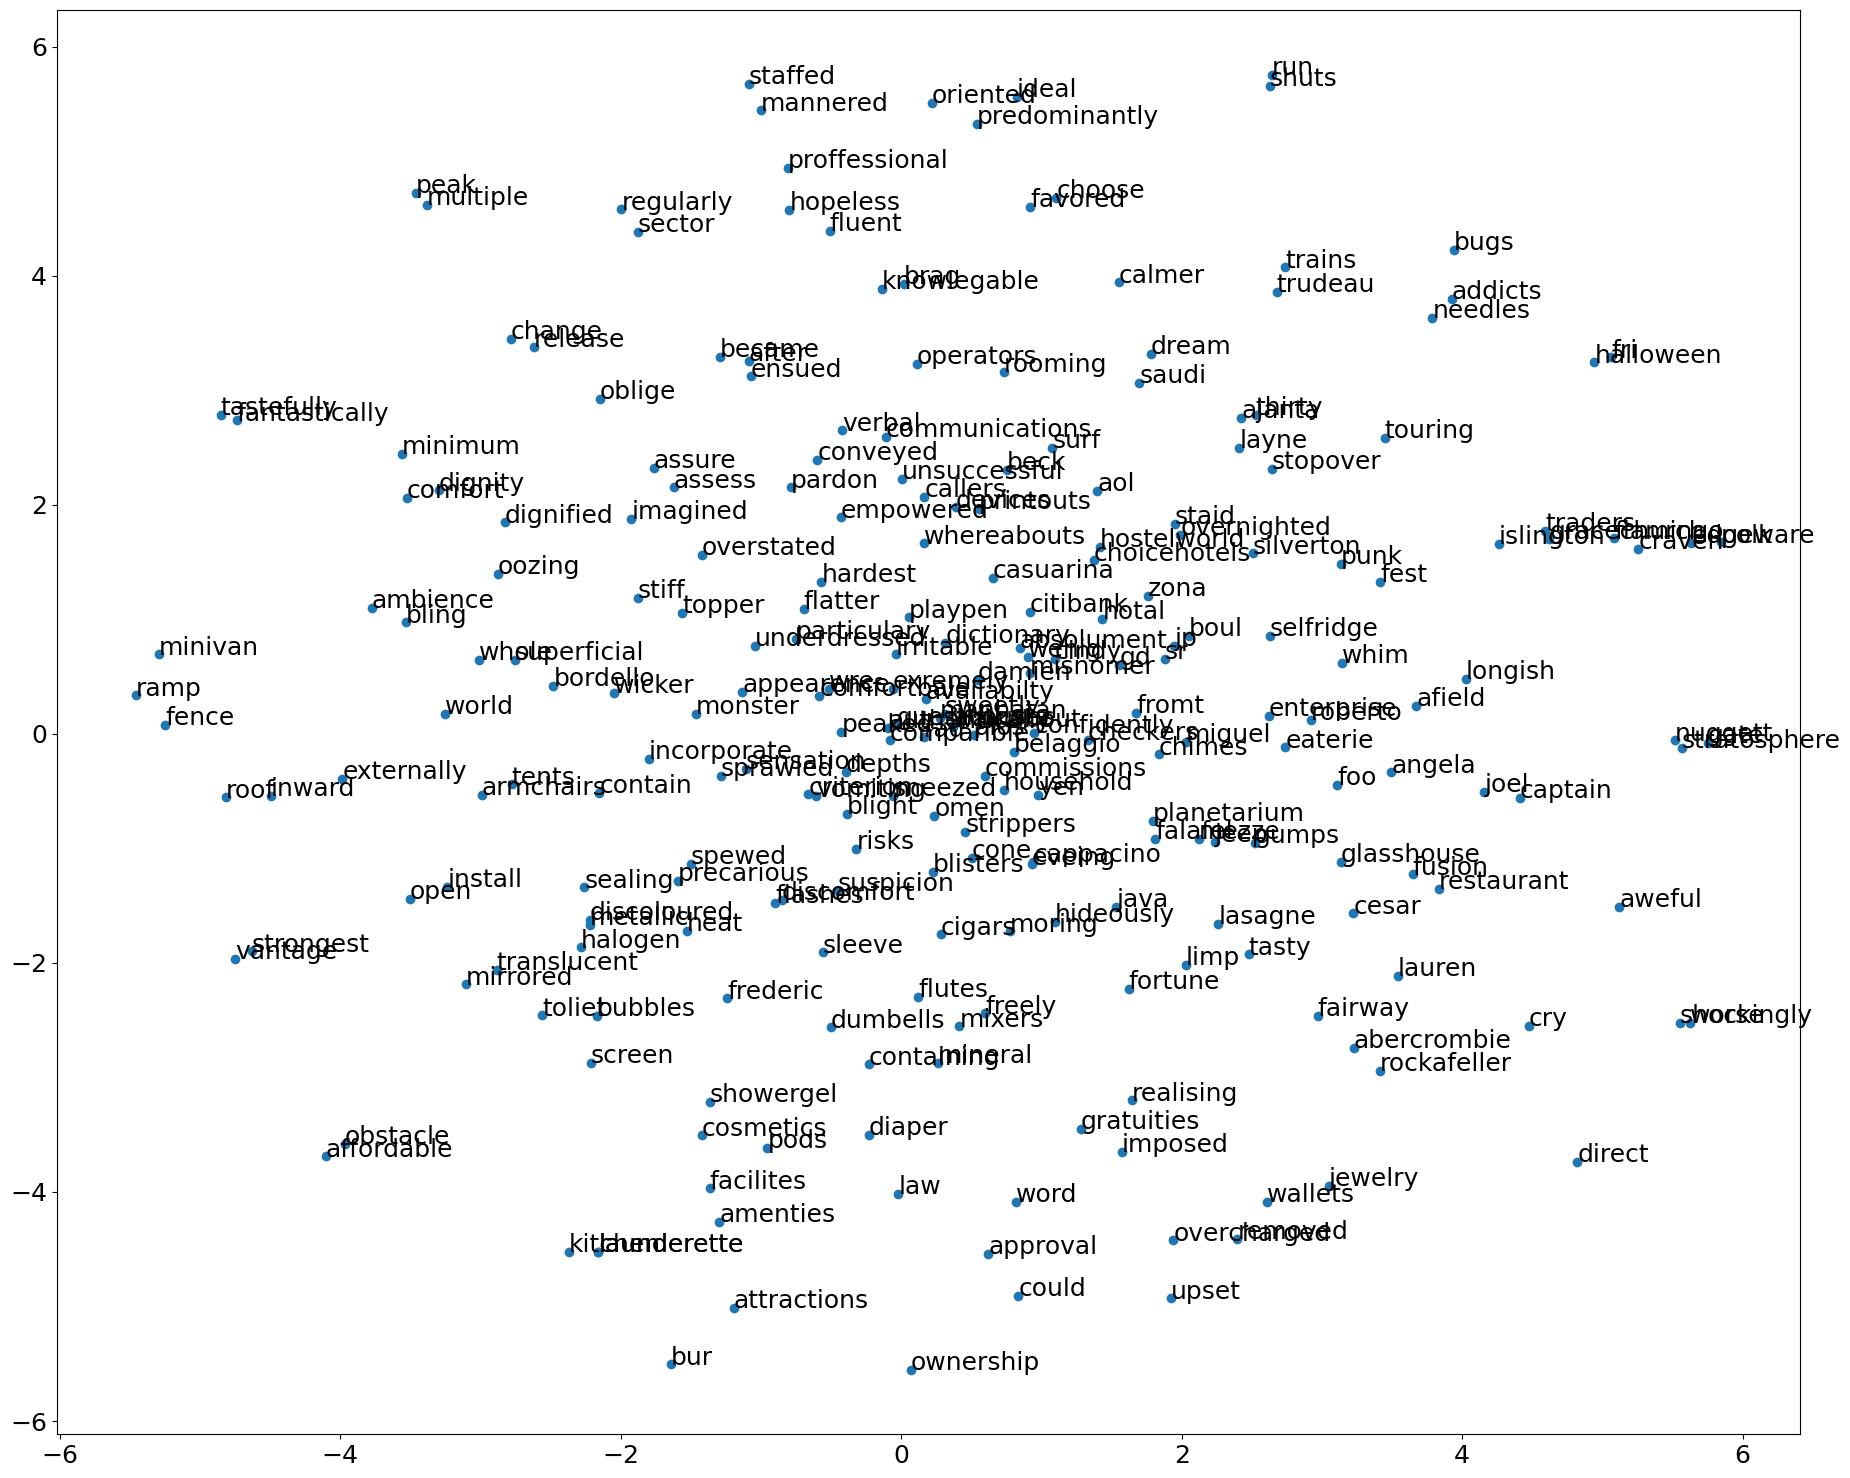

In [3]:
# The following code allows us to train a T-SNE based on the 

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

num_items = 250
wv_from_text = gensim.models.KeyedVectors.load_word2vec_format('./data/reviews_150_10_min_15.model')
vectors = np.asarray(wv_from_text.vectors)
vocab = np.random.choice(np.asarray(wv_from_text.index_to_key), size=num_items)
X = model[vocab]


tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure()
fig.set_size_inches(22.5, 18.5)
plt.rcParams.update({'font.size': 18})

ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

plt.show()

## Exercise: Qualitative Analysis

Experiment with T-SNE by changing the number of displayed items and the rendering with matplotlib.

* Visualize the results for models trained on Swiss text and on the review data.
    - this should give you an idea how qualitative visualisations can immediately show you potential problems in your model.
* Change the displayed item by selecting different parts of the vocabulary
    - print(list(model.wv.vocab)) lets you take a look at the vocabulary
    - it usally makes sense to apply qualitative analysis to the extreme values represented by a model
* Change the way the plot is displayed by changing the size of the figure or the font size until you are satisfied with the results. Take a look at the matplotlib documentation if you want to take it a bit further. 
